In [ ]:
# import libraries
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import copy

In [ ]:
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=6, stride=2, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=6, stride=2, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=6, stride=2, padding=1)
        self.relu = nn.ReLU()

    def forward(self, x):
        # print(x.shape)
        x = self.relu(self.conv1(x))
        # print(x.shape)
        x = self.relu(self.conv2(x))
        # print(x.shape)
        x = self.relu(self.conv3(x))
        # print(x.shape)
        return x

Here we define a new class named `Encoder` that inherits from the `nn.Module` class in PyTorch. This class represents the encoder part of our model.

#### Constructor
The `__init__` method is the constructor of the class where we define the various layers of the neural network:
- `self.conv1`: The first convolutional layer with one input channel (grayscale image), 16 output channels, a kernel size of 6, stride of 2, and padding of 1.
- `self.conv2`: The second convolutional layer with 16 input channels, 32 output channels, a kernel size of 6, stride of 2, and padding of 1.
- `self.conv3`: The third convolutional layer with 32 input channels, 64 output channels, a kernel size of 6, stride of 2, and padding of 1.
- `self.relu`: The ReLU activation function applied after each convolutional layer.

#### `forward` Method
The `forward` method defines the forward pass of the data through the network:
1. First, we pass the input data `x` through the first convolutional layer `self.conv1` and apply the ReLU activation function.
2. Then, we pass the result through the second convolutional layer `self.conv2` and apply the ReLU activation function again.
3. Finally, we pass the result through the third convolutional layer `self.conv3` and apply the ReLU activation function.
4. The final result is returned as the output.

This cell creates a simple encoder with three convolutional layers and a ReLU activation function. The input data passes through all three convolutional layers in sequence and is ultimately transformed into a compressed representation produced by the encoder.


In [ ]:
# Define the Decoder
class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        self.conv1 = nn.ConvTranspose2d(64, 32, kernel_size=7, stride=2, padding=1)
        self.conv2 = nn.ConvTranspose2d(32, 16, kernel_size=7, stride=2, padding=1)
        self.conv3 = nn.ConvTranspose2d(16, 1, kernel_size=6, stride=2, padding=1)
        self.relu = nn.ReLU()

    def forward(self, x):
        # print(x.shape)
        x = self.relu(self.conv1(x))
        # print(x.shape)
        x = self.relu(self.conv2(x))
        # print(x.shape)
        x = self.relu(self.conv3(x))
        # print(x.shape)
        return x

In this section, we explain the code for loading the MNIST dataset, defining the autoencoder model, and training the model in English.

#### Loading the MNIST Dataset

- First, a `transform` is defined to convert images to `Tensor`.
- The MNIST dataset is loaded using `torchvision.datasets.MNIST`. The training data is transformed using `transform` and downloaded if necessary.
- A `train_loader` is used to load the data in batches of 32 and shuffle it randomly.

#### Initializing the Encoder and Decoder

- The `Encoder` and `Decoder` models are created.
- Copies of the models are saved before training for later comparisons using `copy.deepcopy`.

#### Defining the Loss Function and Optimizer

- The `MSELoss` (Mean Squared Error Loss) function is used to measure the difference between the original and reconstructed images.
- The `Adam` optimizer with a learning rate of `0.001` is used to update the model weights. The parameters of the encoder and decoder are added to the optimizer.

#### Training the Model

- The number of training epochs (`num_epochs`) is set to 10.
- In each epoch, for each batch of data:
  1. Images and labels are retrieved from `train_loader` (labels are not used and are ignored with `_`).
  2. Gradients are zeroed (`optimizer.zero_grad()`).
  3. Images are encoded into latent representations (`encoded = encoder(img)`).
  4. Latent representations are decoded back into reconstructed images (`decoded = decoder(encoded)`).
  5. The loss function is computed (`loss = criterion(decoded, img)`).
  6. Gradients are calculated (`loss.backward()`).
  7. The optimizer updates the weights (`optimizer.step()`).
- At the end of each epoch, the loss value for that epoch is printed (`print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')`).

This code defines a training process for an autoencoder model using the MNIST dataset. Images are encoded into latent representations and then reconstructed by the decoder. The goal is for the reconstructed images to be close to the original images, which is measured using the `MSELoss` function. The models are trained using the `Adam` optimizer to minimize the loss.


In [ ]:
# Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Initialize the encoder and decoder
encoder = Encoder()
decoder = Decoder()

encoder_before_train = copy.deepcopy(encoder)
decoder_before_train = copy.deepcopy(decoder)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(list(encoder.parameters()) + list(decoder.parameters()), lr=0.001)

# Training the model
num_epochs = 10
for epoch in range(num_epochs):
    for data in train_loader:
        img, _ = data
        optimizer.zero_grad()
        encoded = encoder(img)
        decoded = decoder(encoded)
        loss = criterion(decoded, img)
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

Epoch [1/10], Loss: 0.006106183398514986
Epoch [2/10], Loss: 0.004983674734830856
Epoch [3/10], Loss: 0.004713022615760565
Epoch [4/10], Loss: 0.003858758369460702
Epoch [5/10], Loss: 0.003692934289574623
Epoch [6/10], Loss: 0.002601263578981161
Epoch [7/10], Loss: 0.004006005823612213
Epoch [8/10], Loss: 0.0038659246638417244
Epoch [9/10], Loss: 0.0037371148355305195
Epoch [10/10], Loss: 0.003639287780970335


In this section, we explain the code for visualizing the model's results before and after training in English.

Here, the `matplotlib.pyplot` library is imported for plotting graphs and `numpy` for numerical operations.

- In the `torch.no_grad()` context, gradient calculations are disabled to use less memory and increase execution speed.
- A batch of images and labels is retrieved from `train_loader`.
- The images are encoded into latent representations by the encoder (`encoder`) and then these latent representations are decoded into reconstructed images by the decoder (`decoder`).
- The same process is applied to the models saved before training to also have reconstructed images before training.
- Using `plt.subplots`, a grid of plots is created with 3 rows and 10 columns.
  - The first row: Original images (`images`).
  - The second row: Reconstructed images after training (`decoded_imgs`).
  - The third row: Reconstructed images before training (`decoded_imgs_before_train`).
- For each image in each row, `ax.imshow` is used to display the image. `np.squeeze` is used to remove unnecessary dimensions from the images.
- The axes (`x` and `y`) are turned off for better image display.
- Finally, the plots are displayed with `plt.show()`.

This code visualizes the original and reconstructed images produced by the autoencoder model before and after training in a grid.


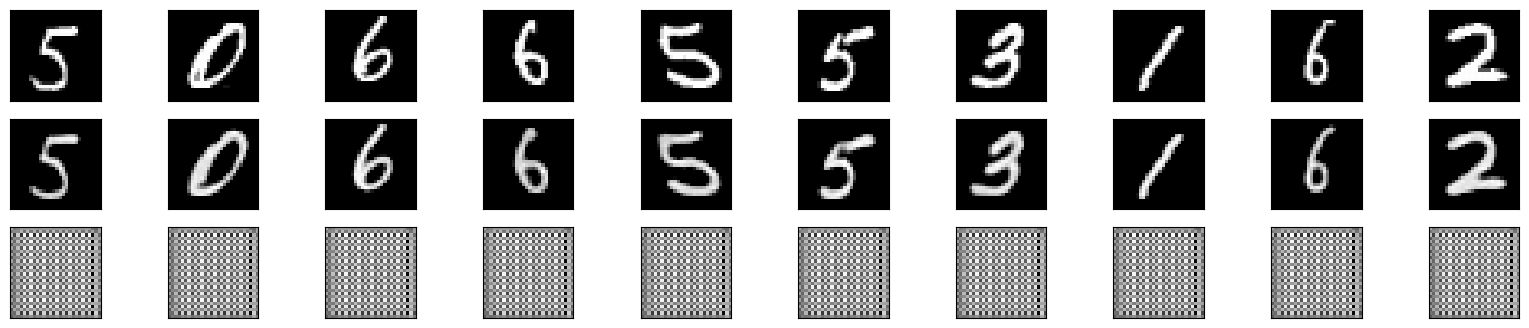

In [17]:
# Visualize the results
import matplotlib.pyplot as plt
import numpy as np

# Original vs Reconstructed Images before training
with torch.no_grad():
    images, labels = next(iter(train_loader))
    encoded_imgs = encoder(images)
    decoded_imgs = decoder(encoded_imgs)
    encoded_imgs_before_train = encoder_before_train(images)
    decoded_imgs_before_train = decoder_before_train(encoded_imgs_before_train)
    fig, axes = plt.subplots(nrows=3, ncols=10, sharex=True, sharey=True, figsize=(20, 4))
    for images, row in zip([images, decoded_imgs, decoded_imgs_before_train], axes):
        for img, ax in zip(images, row):
            ax.imshow(np.squeeze(img), cmap='gray')
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

plt.show()